In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import quantstats as qs
qs.extend_pandas(   )
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
teste

In [2]:
df_returns = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/sb_features_churn_.csv")

In [3]:
df_returns['net_profit'] = df_returns['profit'] - df_returns['value_spent']

In [4]:
df_returns.sort_values('net_profit')

,user_id,gender,state,age,nb_instances,churned,total_days,value_spent,profit,nb_subscriptions,nb_logins,is_real,nb_days_operational,net_profit
14402,654980,M,SP,43.0,194.0,1.0,1100.0,27166.00,-1088152.0,1.0,2019.0,1,17.0,-1115318.00
16055,666877,F,SP,2.0,253.0,1.0,1277.0,20361.71,-992562.0,19.0,4921.0,1,12.0,-1012923.71
11864,631962,F,SP,25.0,477.0,1.0,0.0,0.00,-762764.0,4.0,15196.0,1,11.0,-762764.00
13520,647652,F,SP,2.0,290.0,1.0,620.0,27980.00,-708128.0,3.0,5862.0,1,12.0,-736108.00
12965,642679,M,RS,35.0,83.0,1.0,892.0,18465.36,-378240.0,5.0,3190.0,1,15.0,-396705.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,632415,F,PR,33.0,20.0,1.0,0.0,0.00,116145.0,2.0,628.0,1,18.0,116145.00
13089,643931,M,SP,43.0,22.0,1.0,0.0,0.00,198270.0,2.0,494.0,1,21.0,198270.00
4745,444175,F,SP,41.0,747.0,1.0,1088.0,29339.34,357121.0,13.0,60320.0,1,10.0,327781.66
12062,633877,F,SP,43.0,496.0,1.0,1224.0,9064.14,826452.0,14.0,31304.0,1,14.0,817387.86


In [5]:
df_returns_test = df_returns.loc[(df_returns['profit'] != 0)]
# df_returns_test = df_returns_test.loc[(df_returns['profit'] != 0)]



In [6]:
df_returns_test.sort_values('net_profit',inplace = True)
df_returns_test.set_index('user_id',inplace = True)

In [7]:
df_returns_positive = df_returns.loc[(df_returns['net_profit'] > 0)]
df_returns_negative = df_returns.loc[(df_returns['net_profit'] < 0)]

In [8]:
df_returns_positive.sort_values('value_spent')

,user_id,gender,state,age,nb_instances,churned,total_days,value_spent,profit,nb_subscriptions,nb_logins,is_real,nb_days_operational,net_profit
24627,772493,M,PR,33.0,15.0,0.0,0.0,0.00,247.0,1.0,16.0,1,3.0,247.00
19570,720001,M,BA,58.0,12.0,1.0,0.0,0.00,1523.0,1.0,190.0,1,141.0,1523.00
19554,719848,M,GO,40.0,18.0,1.0,0.0,0.00,360.0,1.0,564.0,1,36.0,360.00
19545,719802,M,SC,61.0,20.0,1.0,0.0,0.00,2526.0,1.0,16.0,1,22.0,2526.00
19544,719801,F,PB,53.0,6.0,1.0,0.0,0.00,165.0,1.0,19.0,1,4.0,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12731,640418,M,RS,36.0,82.0,0.0,1346.0,13066.30,58654.0,1.0,1426.0,1,38.0,45587.70
5359,460562,M,SP,43.0,114.0,1.0,1540.0,26070.36,45353.0,14.0,10654.0,1,30.0,19282.64
4745,444175,F,SP,41.0,747.0,1.0,1088.0,29339.34,357121.0,13.0,60320.0,1,10.0,327781.66
12723,640283,F,RJ,42.0,5.0,1.0,1346.0,32338.80,33586.0,4.0,1100.0,1,450.0,1247.20


In [9]:
df_returns_positive.describe().round(1)

,user_id,age,nb_instances,churned,total_days,value_spent,profit,nb_subscriptions,nb_logins,is_real,nb_days_operational,net_profit
count,766.0,765.0,766.0,766.0,766.0,766.0,766.0,766.0,766.0,766.0,766.0,766.0
mean,676123.9,39.2,30.7,0.9,134.0,878.1,7167.4,2.3,899.1,1.0,51.3,6289.4
std,99400.0,11.3,72.3,0.3,276.5,3358.1,54262.3,2.7,4049.3,0.0,122.6,51970.6
min,286682.0,2.0,1.0,0.0,0.0,0.0,0.7,1.0,1.0,1.0,1.0,0.7
25%,651920.5,31.0,6.0,1.0,0.0,0.0,258.5,1.0,38.0,1.0,5.0,199.9
50%,714040.5,38.0,13.5,1.0,0.0,0.0,951.0,1.0,123.5,1.0,15.0,639.6
75%,736564.8,45.0,27.0,1.0,132.0,512.4,2613.0,2.0,439.0,1.0,37.0,1969.0
max,772493.0,81.0,939.0,1.0,2244.0,62951.4,1154719.0,25.0,60320.0,1.0,1029.0,1091767.6


In [10]:
df_returns_negative.describe().round(1)

,user_id,age,nb_instances,churned,total_days,value_spent,profit,nb_subscriptions,nb_logins,is_real,nb_days_operational,net_profit
count,10885.0,10881.0,10885.0,10885.0,10885.0,10885.0,10885.0,10885.0,10885.0,10885.0,10885.0,10885.0
mean,590200.8,39.2,18.3,1.0,235.8,1620.6,-1234.3,2.4,666.3,0.9,36.4,-2855.0
std,141137.1,11.0,47.3,0.2,335.4,3457.5,19252.1,3.8,5589.6,0.3,85.8,20015.8
min,283472.0,0.0,0.0,0.0,0.0,0.0,-1088152.0,1.0,1.0,0.0,0.0,-1115318.0
25%,476897.0,32.0,3.0,1.0,70.0,198.0,-272.0,1.0,27.0,1.0,3.0,-2108.0
50%,641502.0,38.0,8.0,1.0,132.0,598.0,0.0,1.0,82.0,1.0,10.0,-800.0
75%,716656.0,45.0,18.0,1.0,255.0,1560.0,0.0,2.0,279.0,1.0,31.0,-363.0
max,773439.0,102.0,2204.0,1.0,3579.0,86776.4,22525.0,172.0,409814.0,1.0,1095.0,-0.1


### Matriz de correlação

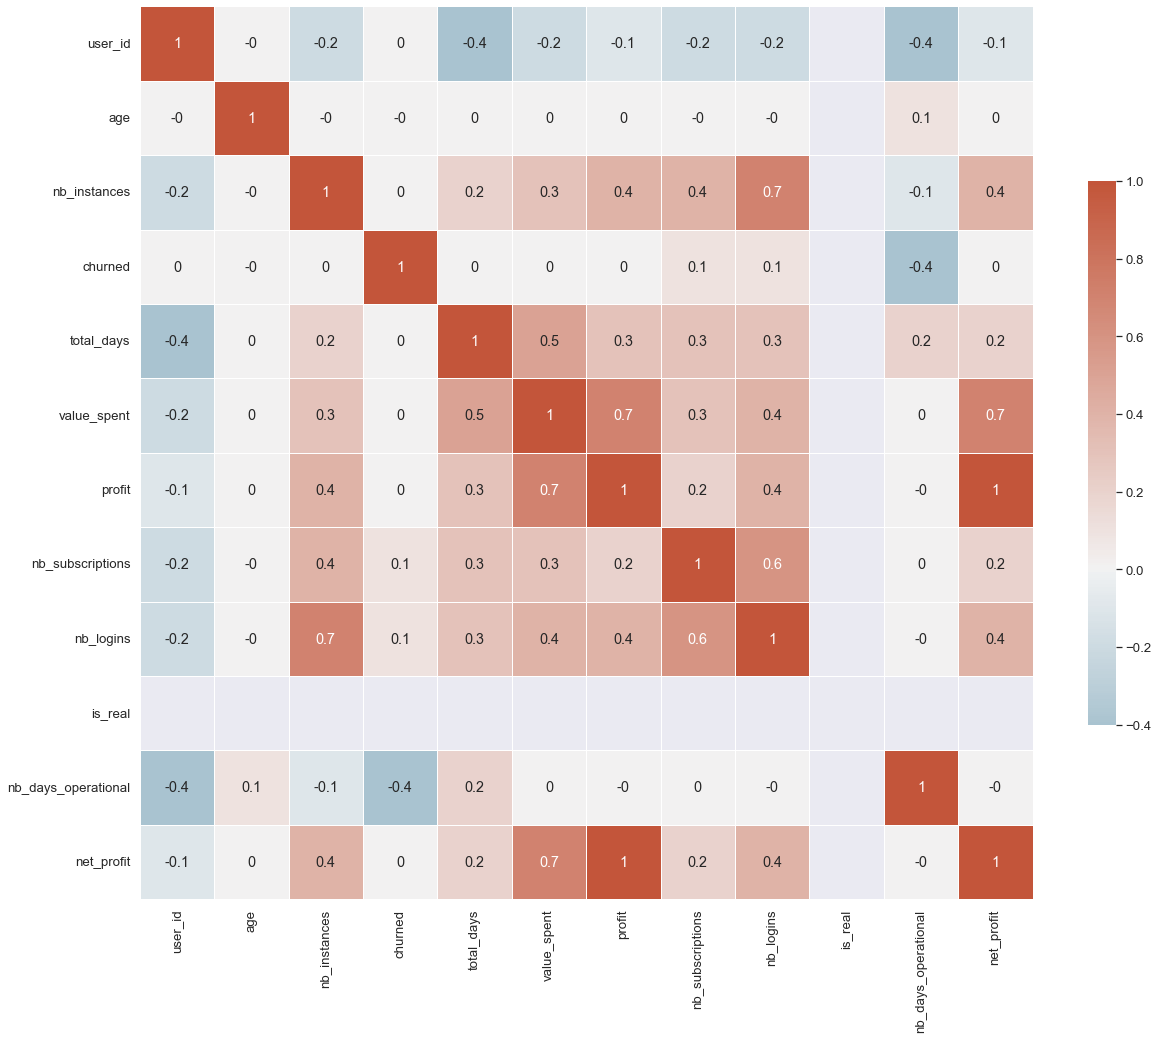

In [11]:
sns.set(font_scale = 1.2) # Tamanho da fonte da imagem

corrMatrix = round(df_returns_positive.corr(), 1) # Matriz de Correlação

f, ax = plt.subplots(figsize = (20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
sns.heatmap(corrMatrix, cmap = cmap, vmax = 1, center = 0, square = True, linewidths = 0.7, 
            cbar_kws = {'shrink': 0.5}, annot = True)

plt.show()

# Análise DF KR4

In [12]:
df_data = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/kr4_results.csv")
df_kr4 = df_data.copy()
df_kr4['total'] = df_kr4['qtd_profit'] + df_kr4['qtd_loss']

In [13]:
df_data.sort_values('date')

,date,category,qtd_profit,qtd_loss
312,2022-01-03,monobroker,14,29
313,2022-01-03,multibroker,62,106
314,2022-01-03,smarttinvest,1,5
315,2022-01-04,inter,1,3
316,2022-01-04,monobroker,12,34
...,...,...,...,...
362,2023-05-12,monobroker,34,28
367,2023-05-15,smarttinvest,233,434
366,2023-05-15,multibroker,381,299
365,2023-05-15,monobroker,200,148


## Análise Ponderada (nova)

,qtd_profit,qtd_loss,total,%_profit_new
date,,,,
2022-01-03,77,140,217,0.35
2022-01-04,83,127,210,0.40
2022-01-05,89,130,219,0.41
2022-01-06,88,124,212,0.42
2022-01-07,111,147,258,0.43
...,...,...,...,...
2023-05-09,77,61,138,0.56
2023-05-10,108,48,156,0.69
2023-05-11,152,139,291,0.52


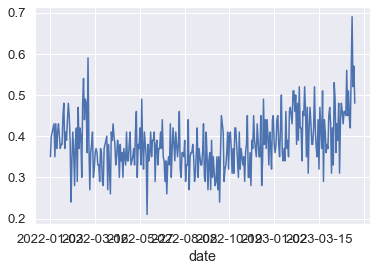

In [14]:
df_kr4_per_date = df_kr4.groupby('date').sum()
df_kr4_per_date['%_profit_new'] = round(df_kr4_per_date['qtd_profit']/df_kr4_per_date['total'],2)
df_kr4_per_date['%_profit_new'].plot()
df_kr4_per_date.sort_values('date')

## Análise metodologia Atual

In [15]:
df_kr4['%_profit_old'] = round(df_kr4['qtd_profit']/df_kr4['total'],2)
df_kr4.sort_values('date')

,date,category,qtd_profit,qtd_loss,total,%_profit_old
312,2022-01-03,monobroker,14,29,43,0.33
313,2022-01-03,multibroker,62,106,168,0.37
314,2022-01-03,smarttinvest,1,5,6,0.17
315,2022-01-04,inter,1,3,4,0.25
316,2022-01-04,monobroker,12,34,46,0.26
...,...,...,...,...,...,...
362,2023-05-12,monobroker,34,28,62,0.55
367,2023-05-15,smarttinvest,233,434,667,0.35
366,2023-05-15,multibroker,381,299,680,0.56
365,2023-05-15,monobroker,200,148,348,0.57


,qtd_profit,qtd_loss,total,%_profit_old
date,,,,
2022-01-03,25.67,46.67,72.33,0.29
2022-01-04,27.67,42.33,70.00,0.32
2022-01-05,44.50,65.00,109.50,0.44
2022-01-06,29.33,41.33,70.67,0.38
2022-01-07,37.00,49.00,86.00,0.43
...,...,...,...,...
2023-05-09,38.50,30.50,69.00,0.54
2023-05-10,54.00,24.00,78.00,0.69
2023-05-11,76.00,69.50,145.50,0.52


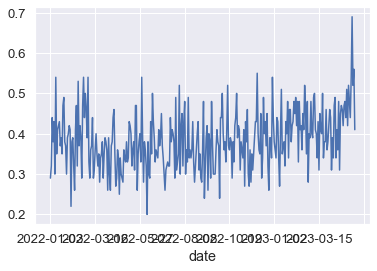

In [16]:
df_kr4_mean_per_date = df_kr4.groupby('date').mean().round(2)
df_kr4_mean_per_date['%_profit_old'].plot()
df_kr4_mean_per_date

## Comparação de resultados

In [17]:
df_final = pd.DataFrame(df_kr4_per_date['%_profit_new'], index= df_kr4_per_date.index)

In [18]:
df_final['%_profit_old'] = df_kr4_mean_per_date['%_profit_old']
df_final['delta'] = abs(df_final['%_profit_new'] - df_final['%_profit_old'])
df_final

,%_profit_new,%_profit_old,delta
date,,,
2022-01-03,0.35,0.29,0.06
2022-01-04,0.40,0.32,0.08
2022-01-05,0.41,0.44,0.03
2022-01-06,0.42,0.38,0.04
2022-01-07,0.43,0.43,0.00
...,...,...,...
2023-05-09,0.56,0.54,0.02
2023-05-10,0.69,0.69,0.00
2023-05-11,0.52,0.52,0.00


<AxesSubplot:xlabel='date'>

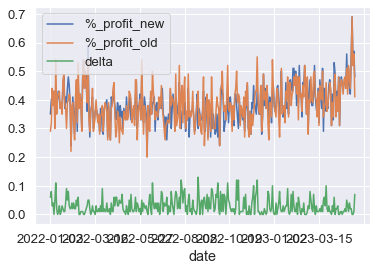

In [19]:
df_final.plot()

## Sem SI

In [20]:
df_si_out = df_data.copy()

In [21]:
df_si_out = df_si_out[df_si_out['category']!='smarrttinvest']

In [22]:
df_si_out

,date,category,qtd_profit,qtd_loss
0,2022-02-03,inter,10,60
1,2022-02-03,monobroker,25,79
2,2022-02-03,multibroker,67,181
3,2022-02-04,inter,6,64
4,2022-02-04,monobroker,29,65
...,...,...,...,...
961,2022-08-15,monobroker,21,78
962,2022-08-15,multibroker,29,61
963,2022-08-16,inter,9,17
964,2022-08-16,monobroker,44,86


# Análise nova metodologia de cálculo KR4

In [23]:
df_kr_full = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/gross_profit_2023_clientes.csv")
df_kr_full = df_kr_full.groupby('s10i_login').sum()
df_kr_full['Positive'] = np.where(df_kr_full['sum_gross_profit'] > 0, 1, 0)
df_kr_full

,id_s10i_client,id_s10i_client_brokerage,sum_gross_profit,Positive
s10i_login,,,,
00068753004,645683,1797975,-1600.0,0
00119943042,761029,2061900,-97.0,0
003058,639242,1783536,-76.0,0
00347444288,762753,2064872,-1023.0,0
00395627940,720607,1974584,-115.0,0
...,...,...,...,...
zebobi,683549,1884143,-454.0,0
zeltakat4,629784,2085532,835.0,1
zezinhons,763789,2066409,-244.0,0


In [24]:
kr4_value = round((df_kr_full['Positive'].sum()/len(df_kr_full))*100,2)
kr4_value

36.43

In [25]:
df_kr_daily = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/detalhamento_gross_profit_usuarios.csv")
df_kr_daily.dropna(inplace=True)
df_kr_daily['Positive'] = np.where(df_kr_daily['sum_gross_profit'] > 0, 1, 0)
df_kr_daily['all'] = 1
df_kr_daily['dia'] = pd.to_datetime(df_kr_daily['dia'])
df_kr_daily.set_index('dia', inplace=True)

df_kr_daily.sort_values('id_s10i_client')

,id_s10i_client,s10i_login,id_s10i_client_brokerage,sum_gross_profit,Positive,all
dia,,,,,,
2023-01-18,2,gomide,619070,-44.0,0,1
2023-02-08,2,gomide,619070,96.0,1,1
2023-04-12,2,gomide,619070,-22.0,0,1
2023-03-09,2,gomide,619070,765.0,1,1
2023-05-03,2,gomide,619070,1852.0,1,1
...,...,...,...,...,...,...
2023-05-17,773888,MickBryan2,2086419,-1529.0,0,1
2023-05-18,773888,MickBryan2,2086419,149.0,1,1
2023-05-18,773889,ziul@,2086431,-204.0,0,1


In [26]:
df_agrupado = df_kr_daily.groupby(pd.Grouper(freq='D')).sum()
df_agrupado

,id_s10i_client,id_s10i_client_brokerage,sum_gross_profit,Positive,all
dia,,,,,
2023-01-02,328072106,1078952861,-129128.84,276,662
2023-01-03,351451874,1155922035,104583.64,439,704
2023-01-04,359604413,1181850070,6066.23,387,714
2023-01-05,394136808,1278206467,48734.21,471,771
2023-01-06,421535834,1362711765,-21881.50,460,811
...,...,...,...,...,...
2023-05-14,0,0,0.00,0,0
2023-05-15,315052177,1040954811,-80043.41,361,632
2023-05-16,336133116,1125541812,-56454.04,428,694


In [27]:
df_agrupado['%positive'] = round((df_agrupado['Positive'] / df_agrupado['all'])*100,2)
df_agrupado.dropna(inplace=True)
df_agrupado.drop(['id_s10i_client','id_s10i_client_brokerage','sum_gross_profit'], axis = 1, inplace = True)

In [28]:
df_agrupado.tail(15)

,Positive,all,%positive
dia,,,
2023-04-27,343,676,50.74
2023-04-28,269,678,39.68
2023-05-02,530,732,72.40
2023-05-03,369,664,55.57
2023-05-04,320,779,41.08
2023-05-05,332,642,51.71
2023-05-08,370,662,55.89
2023-05-09,400,659,60.70
2023-05-10,366,627,58.37


<AxesSubplot:xlabel='dia'>

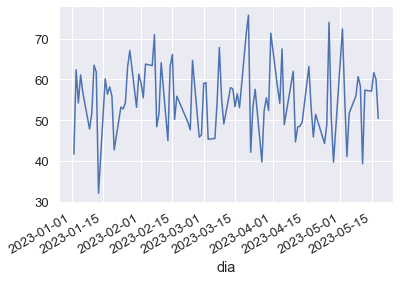

In [29]:
df_agrupado['%positive'].plot()

In [30]:
df_kr_full.sort_values("sum_gross_profit").tail(20)

,id_s10i_client,id_s10i_client_brokerage,sum_gross_profit,Positive
s10i_login,,,,
israel68,174260,761234,35209.00,1
glaucoheitor,438406,1335697,35619.00,1
eproszek,640418,1788509,36299.00,1
antonyodavyd,1977135,5979421,36457.03,1
jocatavares,882392,3235263,44296.00,1
Figaalex,168191,576239,46961.99,1
arturbessas,42482,3997799,49932.80,1
Glaubern,479564,1721376,50119.99,1
DrRom,763969,2067158,53408.03,1


## Comparar cenários X clientes com Lucro por dia

In [31]:
import yfinance as yf

start = df_agrupado.index.min().replace(hour=0, minute=0, second=0)
end = df_agrupado.index.max().replace(hour=23, minute=59, second=59)
ticker = 'WIN'
if ticker == 'WIN':
    benchmark = "^BVSP"
elif ticker == 'WDO':
    benchmark = "BRL=X"

df_ibovespa = yf.download(benchmark, start=start, end=end)[['Open', 'High', 'Low', 'Close']].astype(float)

df_ibovespa.index = pd.DatetimeIndex(df_ibovespa.index.date)
df_ibovespa.index.names = ['Datetime']
df_ibovespa['Var%'] = abs(df_ibovespa["High"] - df_ibovespa["Low"])/df_ibovespa["Open"]

day_amp_scale = df_ibovespa['Var%'].quantile([.33,.66]).to_list()
sample_size = len(df_ibovespa.loc[(df_ibovespa['Var%'] <= day_amp_scale[0])])

[*********************100%***********************]  1 of 1 completed


In [32]:
df_agrupado['vol'] = df_ibovespa['Var%']

df_agrupado['cenário'] = np.where(df_agrupado['vol']< day_amp_scale[0], 'Low',np.where((df_agrupado['vol'] >= day_amp_scale[0]) & (df_agrupado['vol'] < day_amp_scale[1]), 'Medium', 'High'))

In [33]:
df_mean_cenarios = df_agrupado.groupby('cenário').mean()
df_mean_cenarios = df_mean_cenarios.drop(['vol'], axis = 1).round(1)
df_mean_cenarios

,Positive,all,%positive
cenário,,,
High,425.3,760.7,55.7
Low,406.0,736.9,55.3
Medium,419.1,769.7,54.3


# Resultado Normalizado por Contrato

In [34]:
df_normalized = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/query_clientes_lucro_normalizado.csv")


In [35]:
df_normalized['dia'] = pd.to_datetime(df_normalized['dia'])
df_normalized.set_index('dia', inplace=True)
df_normalized = df_normalized.groupby('s10i_login').sum()

In [36]:
df_normalized

,id_s10i_client,id_s10i_client_brokerage,sum_gross_profit,normalized_profit
s10i_login,,,,
00068753004,119451355,332625375,-1600.0,-823.00
00119943042,18264696,49485600,-97.0,-27.00
003058,9588630,26753040,-76.0,-0.76
00347444288,21357084,57816416,-1023.0,-943.00
00395627940,2161821,5923752,-115.0,-47.00
...,...,...,...,...
zebobi,108684291,299578737,-454.0,463.00
zeltakat4,4408488,14598724,835.0,55.00
zezinhons,22913670,61992270,-244.0,-138.00


In [37]:
df_new = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/new_results_data.csv")
df_new = df_new.dropna()

In [38]:
df_new

,date,user_id,s10i_login,platform_id,strategy_id,category,number_of_traded_stocks,result
0,2023-05-08,543979,yago_ml_4338,5900,588,smarttinvest,88,-6.50
1,2023-05-16,588738,pedro_hl_0650,5900,588,smarttinvest,2000,6540.00
2,2023-05-12,331974,MOSOU,1000,413,multibroker,6,-12.00
3,2023-05-18,618222,rodrigo.oliva,1000,518,multibroker,4,80.00
4,2023-05-12,618222,rodrigo.oliva,1000,518,multibroker,4,90.00
...,...,...,...,...,...,...,...,...
27850,2023-05-16,14803,dbsiqueira,1000,321,multibroker,30,-1730.00
27851,2023-05-18,725545,sandropires,1000,890,multibroker,6,-165.00
27852,2023-05-16,725545,sandropires,1000,890,multibroker,24,485.00
27853,2023-05-18,743194,EFDO,308,1060,monobroker,6,-209.00


## Agrupado por category

In [39]:
df_category = df_new.groupby('category').sum()
df_category['Positive'] = np.where(df_category['result'] > 0, 1, 0)
df_category

,user_id,platform_id,strategy_id,number_of_traded_stocks,result,Positive
category,,,,,,
inter,10654636,16485,5112,157,796.00,1
monobroker,4126158536,11874597,3369331,204023,20066.50,1
multibroker,8334007589,18039000,9343264,1481233,56914.08,1
smarttinvest,23777429,401200,42082,41191,-22998.53,0


In [40]:
df_new_2 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/new_results_data.csv")
df_new_2['dia'] = pd.to_datetime(df_new_2['date'])
df_new_2.set_index('dia', inplace=True)
df_new_2 = df_new_2.groupby('strategy_id').sum()
df_new_2.drop(['user_id','platform_id', 'number_of_traded_stocks'], axis = 1, inplace = True)
df_new_2.sort_values('result')

,result
strategy_id,
1176,-293742.03
321,-270794.01
962,-49192.00
1126,-46044.50
712,-37802.00
...,...
913,67555.00
890,83457.03
691,147440.00


In [41]:
df_new_2.loc[413]

result    39594.2
Name: 413, dtype: float64

In [42]:
df_new_3 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/results_data_23.csv")
df_new_3

,date,user_id,s10i_login,platform_id,instance_id,strategy_id,category,number_of_traded_stocks,result
0,2023-02-13,137217,gschinner,1000,2424826,224,multibroker,8,-80.0
1,2023-02-15,137217,gschinner,1000,2424826,224,multibroker,4,60.0
2,2023-03-28,137217,gschinner,1000,2424826,224,multibroker,2,30.0
3,2023-04-10,137217,gschinner,1000,2424826,224,multibroker,2,30.0
4,2023-03-27,137217,gschinner,1000,2424826,224,multibroker,2,-71.0
...,...,...,...,...,...,...,...,...,...
212441,2023-05-18,116250,rochamelo,1000,3537158,224,multibroker,14,248.0
212442,2023-05-16,116250,rochamelo,1000,3537158,224,multibroker,10,-173.0
212443,2023-05-17,228215,Luciotorres,1000,3538270,890,multibroker,8,90.0
212444,2023-05-18,228215,Luciotorres,1000,3538270,890,multibroker,2,10.0


In [43]:
df_new_3['dia'] = pd.to_datetime(df_new_3['date'])
df_new_3.set_index('dia', inplace=True)
df_new_3 = df_new_3.groupby('instance_id').sum()
df_new_3.drop(['user_id','platform_id', 'number_of_traded_stocks'], axis = 1, inplace = True)
df_new_3.sort_values('result')

,strategy_id,result
instance_id,,
3480181,5180,-63626.00
3482753,413,-61222.00
3436667,11564,-60413.00
3488383,6099,-55800.00
3513851,1344,-53727.00
...,...,...
3392853,19008,70040.00
3223465,15120,90434.09
3349412,42850,117728.00


In [292]:
df_new_20 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/results_data_20.csv")
df_new_20.sort_values('instance_id')

,date,user_id,s10i_login,platform_id,instance_id,strategy_id,category,number_of_traded_stocks,result
278508,2021-03-17,3291,nukelinux,1000,13138,51,multibroker,100,-57.50
180211,2021-02-24,4649,alysso,1000,19018,50,multibroker,10000,192963.50
81916,2021-09-02,7803,fernando.biscoito@gmail.com,1000,35524,47,multibroker,2,67.00
81915,2021-08-23,7803,fernando.biscoito@gmail.com,1000,35524,47,multibroker,500,NaN
1115786,2021-03-30,4311,gleyberuchoa,1000,68627,121,multibroker,208,925.05
...,...,...,...,...,...,...,...,...,...
2681997,2023-05-18,47585,rosileinebro,1000,3540045,224,multibroker,4,60.00
1844083,2023-05-18,101280,pc,1000,3540077,413,multibroker,6,-26.00
1060163,2023-05-18,664919,47986395168,1000,3540090,413,multibroker,30,360.00
1468489,2023-05-18,756940,joseismael,1000,3540093,413,multibroker,4,-12.00


In [295]:
df_new_20 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/new_results_data.csv")
df_new_20

,date,user_id,s10i_login,platform_id,strategy_id,category,number_of_traded_stocks,result
0,2023-05-08,543979,yago_ml_4338,5900,588,smarttinvest,88,-6.50
1,2023-05-16,588738,pedro_hl_0650,5900,588,smarttinvest,2000,6540.00
2,2023-05-12,331974,MOSOU,1000,413,multibroker,6,-12.00
3,2023-05-18,618222,rodrigo.oliva,1000,518,multibroker,4,80.00
4,2023-05-12,618222,rodrigo.oliva,1000,518,multibroker,4,90.00
...,...,...,...,...,...,...,...,...
27851,2023-05-18,725545,sandropires,1000,890,multibroker,6,-165.00
27852,2023-05-16,725545,sandropires,1000,890,multibroker,24,485.00
27853,2023-05-18,743194,EFDO,308,1060,monobroker,6,-209.00
27854,2023-05-18,772211,rdmnetto,1000,1176,multibroker,122,-2375.01


In [251]:

df_new_20['dia'] = pd.to_datetime(df_new_20['date'])
df_new_20.set_index('dia', inplace=True)
df_new_20 = df_new_20.groupby('strategy_id').sum()
df_new_20.drop(['user_id','platform_id', 'number_of_traded_stocks'], axis = 1, inplace = True)
df_new_20.sort_values('result')

,result
strategy_id,
1176,-293742.03
321,-270794.01
962,-49192.00
1126,-46044.50
712,-37802.00
...,...
913,67555.00
890,83457.03
691,147440.00


In [256]:
df_new_20.sort_values('strategy_id')

,result
strategy_id,
216,66721.08
224,-30441.50
293,120.00
317,5204.00
321,-270794.01
...,...
1148,34484.20
1163,-430.00
1164,2340.05


In [46]:
df_new_20_2 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/results_data_20.csv")
df_new_20_2

,date,user_id,s10i_login,platform_id,instance_id,strategy_id,category,number_of_traded_stocks,result
0,2021-02-18,1561,pedroivoqb,1000,2218488,216,multibroker,18,-523.0
1,2021-02-17,1561,pedroivoqb,1000,2218488,216,multibroker,24,-390.0
2,2021-02-22,1561,pedroivoqb,1000,2218488,216,multibroker,42,-1272.0
3,2021-02-09,1561,pedroivoqb,1000,2218488,216,multibroker,24,753.0
4,2021-02-08,1561,pedroivoqb,1000,2218488,216,multibroker,18,501.0
...,...,...,...,...,...,...,...,...,...
2681994,2023-05-17,19074,Fernando26,3,3539051,216,monobroker,28,66.0
2681995,2023-05-18,459434,882612,1000,3539673,413,multibroker,0,NaN
2681996,2023-05-18,25328,rubensxp,308,3540035,224,monobroker,4,4.0
2681997,2023-05-18,47585,rosileinebro,1000,3540045,224,multibroker,4,60.0


In [47]:
df_new_20_2['dia'] = pd.to_datetime(df_new_20_2['date'])
df_new_20_2.set_index('dia', inplace=True)
df_new_20_2 = df_new_20_2.groupby('instance_id').sum()
df_new_20_2.drop(['user_id','platform_id', 'number_of_traded_stocks'], axis = 1, inplace = True)
df_new_20_2.sort_values('result')

,strategy_id,result
instance_id,,
2118850,413,-2.703312e+07
2501892,216,-1.234195e+07
2323439,6910,-1.207800e+07
2664090,216,-9.775185e+06
2272898,1080,-7.665000e+06
...,...,...
2192913,3247,1.507469e+07
2381848,1080,1.997156e+07
2501863,216,2.098104e+07


# Análise de clientes com lucro histórica, Semestral, a partir de 2021

In [48]:
df_new_20_3 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/results_data_21.csv")
df_new_20_3.dropna(inplace=True)
df_new_20_3['dia'] = pd.to_datetime(df_new_20_3['date'])
df_new_20_3.set_index('dia', inplace=True)

In [49]:
df_new_21_s1 = df_new_20_3.loc['2021-01-01':'2021-06-30']
df_new_21_s2 = df_new_20_3.loc['2021-07-01':'2021-12-31']
df_new_22_s1 = df_new_20_3.loc['2022-01-01':'2022-06-30']
df_new_22_s2 = df_new_20_3.loc['2022-07-01':'2022-12-31']
df_new_23_s1 = df_new_20_3.loc['2023-01-01':]

In [50]:
def group_by_user(df):
    df1 = df.groupby('user_id').sum()
    df1['Positive'] = np.where(df1['result'] > 0, 1, 0)
    positive_clients = round((df1['Positive'].sum()/len(df1))*100,2)
    return df1, positive_clients

In [51]:
df_new_21_s1, s1_21_percentual = group_by_user(df_new_21_s1)
df_new_21_s2, s2_21_percentual = group_by_user(df_new_21_s2)
df_new_22_s1, s1_22_percentual = group_by_user(df_new_22_s1)
df_new_22_s2, s2_22_percentual = group_by_user(df_new_22_s2)
df_new_23_s1, s1_23_percentual = group_by_user(df_new_23_s1)

In [52]:
s1_21_percentual

43.23

In [53]:
s2_21_percentual

34.28

In [54]:
s1_22_percentual

32.66

In [55]:
s2_22_percentual

26.51

In [56]:
s1_23_percentual

34.49

In [57]:
df_new_23_may = df_new_20_3.loc['2023-05-01':]
df_new_23_may, s1_23_may_percentual = group_by_user(df_new_23_may)

In [58]:
s1_23_may_percentual

39.85

In [59]:
df_new_22_s2

,platform_id,instance_id,strategy_id,number_of_traded_stocks,result,Positive
user_id,,,,,,
132,58000,159272490,29927,8110,2693.00,1
155,13000,44050825,12194,116,-1089.99,0
436,70000,227282069,29190,140,740.00,1
510,5900,1873536,630,6,3.31,1
744,76000,184143969,25907,70604,-4399.00,0
...,...,...,...,...,...,...
760627,20450,17041629,3995,32,894.00,1
760657,36810,30695305,7192,64,-37.00,0
760704,24540,20461234,4788,50,-66.00,0


In [60]:
df_new_22_s2.sort_values('result')

,platform_id,instance_id,strategy_id,number_of_traded_stocks,result,Positive
user_id,,,,,,
658701,47224,3075600854,421888,46422,-312463.17,0
747759,12089,36439546,2464,412,-279494.75,0
679137,1129412,4499582341,576730,14162688,-238354.37,0
736050,672066,2284009912,332625,11742,-219611.00,0
33484,495,512975989,99651,24000,-179435.00,0
...,...,...,...,...,...,...
361617,64000,203313860,14336,1919,363200.00,1
660059,13000,36360951,5369,2368,391756.00,1
697380,15386,43987455,6616,130,460554.49,1


In [61]:
df_new_23_may['result'].sum()

-309358.42999999993

In [62]:
df_new_23_may_2 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/results_data_21.csv")

In [63]:
df_new_23_may_2.loc['2023-04-08':'2023-04-08',:]

,date,user_id,s10i_login,platform_id,instance_id,strategy_id,category,number_of_traded_stocks,result


In [64]:
df_new_23_may_2['dia'] = pd.to_datetime(df_new_23_may_2['date'])
df_new_23_may_2.set_index('dia', inplace=True)
# df_new_23_may_2 = df_new_23_may_2.loc['2023-05-01':]
df_new_23_may_2.dropna(inplace=True)
df_new_23_may_2 = df_new_23_may_2.groupby(['dia','user_id']).sum().reset_index()

In [65]:
df_new_23_may_2['Positive'] = np.where(df_new_23_may_2['result']>0,1,0)
df_new_23_may_2['Negative'] = np.where(df_new_23_may_2['result']<0,1,0)

df_new_23_may_2['all'] = 1
df_new_23_may_2.sort_values('dia')

,dia,user_id,platform_id,instance_id,strategy_id,number_of_traded_stocks,result,Positive,Negative,all
0,2021-01-01,352773,11800,4828709,1176,1516,-0.12,0,1,1
1,2021-01-01,527849,2000,4408111,382,80,0.00,0,0,1
2,2021-01-01,602682,5900,2322841,651,50,0.00,0,0,1
3,2021-01-01,633607,5900,2670345,588,23969,0.00,0,0,1
4,2021-01-02,18426,5900,1848549,572,1760,826.38,1,0,1
...,...,...,...,...,...,...,...,...,...,...
866221,2023-05-26,396101,3000,10503709,1050,12,284.00,1,0,1
866222,2023-05-26,396578,616,6760234,448,8,156.00,1,0,1
866223,2023-05-26,403323,2000,7089959,826,24,-17.00,0,1,1
866225,2023-05-26,411385,4090,3543767,224,20,-1200.00,0,1,1


In [66]:
df_new_23_may_2.set_index('dia', inplace=True)
df_new_23_may_2 = df_new_23_may_2.groupby(pd.Grouper(freq='D')).sum()
df_new_23_may_2['%positive'] = df_new_23_may_2['Positive'] / (df_new_23_may_2['Positive']+df_new_23_may_2['Negative'])
df_new_23_may_2.dropna(inplace=True)
df_new_23_may_2

,user_id,platform_id,instance_id,strategy_id,number_of_traded_stocks,result,Positive,Negative,all,%positive
dia,,,,,,,,,,
2021-01-01,2116911,25600,14230006,2797,25615,-0.12,0,1,4,0.000000
2021-01-02,1045285,24600,8668865,2512,2250,8442.98,5,0,5,1.000000
2021-01-04,632199494,9801192,11522263483,2089503,1224894,-394772.29,1122,659,1788,0.629983
2021-01-05,490684425,5737628,10389151572,1730158,1208386,1334269.98,628,799,1430,0.440084
2021-01-06,480156153,5179232,9756931863,1589670,991623,48252.96,929,469,1407,0.664521
...,...,...,...,...,...,...,...,...,...,...
2023-05-22,327187708,2163638,6719263288,1024463,210469,203123.34,423,225,650,0.652778
2023-05-23,327308495,2424473,7817234060,1117300,292441,-146361.09,328,317,646,0.508527
2023-05-24,326151150,2106767,6681859642,1011159,156053,-114754.36,265,370,641,0.417323


In [67]:
df_new_23_may_2.drop(['user_id','platform_id','instance_id','strategy_id','number_of_traded_stocks'], axis=1, inplace=True)

In [68]:
df_new_23_may_2*100

,result,Positive,Negative,all,%positive
dia,,,,,
2021-01-01,-12.0,0,100,400,0.000000
2021-01-02,844298.0,500,0,500,100.000000
2021-01-04,-39477229.0,112200,65900,178800,62.998316
2021-01-05,133426998.0,62800,79900,143000,44.008409
2021-01-06,4825296.0,92900,46900,140700,66.452074
...,...,...,...,...,...
2023-05-22,20312334.0,42300,22500,65000,65.277778
2023-05-23,-14636109.0,32800,31700,64600,50.852713
2023-05-24,-11475436.0,26500,37000,64100,41.732283


In [69]:
df_new_23_may_2.sort_values('%positive').tail(15)

,result,Positive,Negative,all,%positive
dia,,,,,
2022-03-12,620.00,1,0,1,1.0
2021-02-28,20038.00,1,0,2,1.0
2023-04-02,490.00,1,0,1,1.0
2022-03-19,825.00,1,0,1,1.0
2022-03-20,9560.00,1,0,2,1.0
2023-04-08,140.00,1,0,2,1.0
2021-10-16,73.94,1,0,1,1.0
2022-03-27,4200.01,3,0,3,1.0
2022-04-02,3200.00,1,0,1,1.0


# Normalized Results

In [226]:
df_normalized_results_22 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/normalized_results_23.csv")
df_normalized_results_22[df_normalized_results_22['s10i_login'] =='thaisghiro'].sort_values('normalized_result')

,platform_id,user_id,instance_id,date,result,strategy_id,number_of_traded_stocks,normalized_result,category,s10i_login
170568,1000,11166,3534584,2023-05-15,-4853.01,1176,280,-901.273286,multibroker,thaisghiro
170570,1000,11166,3534584,2023-05-18,-2407.00,1176,122,-868.098361,multibroker,thaisghiro
170569,1000,11166,3534584,2023-05-12,-2155.01,1176,186,-544.545538,multibroker,thaisghiro
197204,3,11166,3501977,2023-05-19,-4750.00,691,30,-475.000000,monobroker,thaisghiro
170577,1000,11166,3534584,2023-05-16,-1798.98,1176,162,-466.402222,multibroker,thaisghiro
...,...,...,...,...,...,...,...,...,...,...
135201,1000,11166,3502986,2023-05-09,1460.00,874,10,292.000000,multibroker,thaisghiro
184871,3,11166,3510018,2023-05-09,584.00,966,4,292.000000,monobroker,thaisghiro
170573,1000,11166,3534584,2023-05-25,1019.99,1176,44,394.087045,multibroker,thaisghiro
135196,1000,11166,3502986,2023-04-11,2270.00,874,10,454.000000,multibroker,thaisghiro


In [234]:
df_normalized_results_22 = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/normalized_results_23.csv")
df_normalized_results_22.dropna(inplace=True)
df_normalized_results_22 = df_normalized_results_22.groupby('s10i_login').sum()
df_normalized_results_22['normalized_result'] = np.where(df_normalized_results_22['normalized_result']>df_normalized_results_22['result'],df_normalized_results_22['result'],df_normalized_results_22['normalized_result'])
df_normalized_results_22.sort_values('normalized_result')

,platform_id,user_id,instance_id,result,strategy_id,number_of_traded_stocks,normalized_result
s10i_login,,,,,,,
claudineyleu,1999000,639753963,6895448926,-236432.56,893124,348264,-236432.560000
asalgbr,207,50783034,232504684,-95500.00,47679,1795,-95500.000000
laba25,1101000,504413241,3843038702,-65976.00,517871,47258,-65976.000000
03859189921,56514,296667290,1630656300,-64571.79,115516,458165,-64571.790000
dudu.tsn,35000,27026685,123564691,-49215.00,7840,812,-49215.000000
...,...,...,...,...,...,...,...
06891158737,22394,566883816,2828609410,33617.00,413971,9080,32099.578659
henriquegalante,1294170,9380070,3290001449,56545.64,427965,28677,36701.403959
sandropires,2039489,996898830,4754499129,47546.85,789921,27054,42493.072252


In [278]:
df_normalized_results_22_instance = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/normalized_results_23_date_2.csv")
df_normalized_results_22_instance.dropna(inplace=True)
df_normalized_results_22_instance = df_normalized_results_22_instance.loc[:'2023-05-18',:]
df_normalized_results_22_instance = df_normalized_results_22_instance.groupby('strategy_id').sum()
df_normalized_results_22_instance['normalized_result'] = np.where(df_normalized_results_22_instance['normalized_result']>df_normalized_results_22_instance['result'],df_normalized_results_22_instance['result'],df_normalized_results_22_instance['normalized_result'])

df_normalized_results_22_instance.sort_values('normalized_result')

,platform_id,user_id,instance_id,result,number_of_traded_stocks,normalized_result
strategy_id,,,,,,
1176,51000,25952588,180271903,-179835.92,11333,-179835.920000
321,2473193,1237676526,8289079590,-69479.01,43806,-69479.010000
1126,166030,113688498,613732967,-51609.00,2158,-51609.000000
962,410142,214795666,1493888161,-39644.00,5039,-39644.000000
712,89000,34854602,257875030,-37802.00,2062,-37802.000000
...,...,...,...,...,...,...
413,2834628,1269181009,8684181687,33925.20,56378,14800.626209
857,260381,157466396,991108855,181439.00,7160,19198.749524
216,899126,202750093,1950534222,48157.11,62359,28224.529216


In [279]:
df_group_by_instance = df_normalized_results_22_instance.drop(['platform_id','user_id','instance_id','number_of_traded_stocks'],axis = 1).round(-1).sort_values('result')
df_group_by_instance

,result,normalized_result
strategy_id,,
1176,-179840.0,-179840.0
321,-69480.0,-69480.0
1126,-51610.0,-51610.0
962,-39640.0,-39640.0
712,-37800.0,-37800.0
...,...,...
890,50990.0,44310.0
913,66850.0,9690.0
691,147810.0,38710.0


In [297]:
df_normalized_results_22_instance = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/normalized_results_23_date_2.csv")
# df_normalized_results_22_instance = df_normalized_results_22_instance.loc[:'2023-05-18',:]

df_normalized_results_22_instance['dia'] = pd.to_datetime(df_normalized_results_22_instance['date'])
df_normalized_results_22_instance.set_index('dia', inplace=True)
df_normalized_results_22_instance = df_normalized_results_22_instance.groupby('strategy_id').sum()
df_normalized_results_22_instance.drop(['user_id','platform_id', 'number_of_traded_stocks','instance_id','normalized_result'], axis = 1, inplace = True)
df_normalized_results_22_instance.sort_values('result')

,result
strategy_id,
224,-235168.10
1176,-232718.28
321,-221163.01
712,-57121.00
1137,-55984.00
...,...
216,63617.83
691,75155.00
857,126181.00


In [286]:
df_normalized_results_22_instance = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/normalized_results_23_date_2.csv")

In [290]:
df_normalized_results_22_instance.sort_values('instance_id')

,platform_id,user_id,instance_id,date,result,strategy_id,number_of_traded_stocks,normalized_result,category,s10i_login
19347,1000,19836,249885,2023-05-15,-165.0,224,8,-165.0,multibroker,fepena
19091,1000,19836,254030,2023-05-15,-230.0,224,12,-230.0,multibroker,fepena
1409,1000,39918,344494,2023-05-02,42.0,224,4,21.0,multibroker,marcelobro
18380,1000,39918,344494,2023-05-15,100.0,224,4,50.0,multibroker,marcelobro
3673,1000,39918,344494,2023-05-03,68.0,224,4,34.0,multibroker,marcelobro
...,...,...,...,...,...,...,...,...,...,...
37910,5900,6458,3546801,2023-05-26,NaN,588,620,NaN,smarttinvest,etosanches
36085,308,25328,3546832,2023-05-26,-14.0,224,20,-7.0,monobroker,rubensxp
36939,1000,595221,3546841,2023-05-26,310.0,385,100,31.0,multibroker,EDemasi
36220,308,25328,3546885,2023-05-26,-96.0,224,4,-48.0,monobroker,rubensxp


# Melhores Clientes por Resultados normalizados Eliminando Canais de frequência

# Olhando APENAS 2023

In [296]:
df_top_clients_norm = pd.read_csv("C:/Users/IGOR NOGUEIRA BARROS/Downloads/normalized_results_23_date.csv")

,platform_id,user_id,instance_id,date,result,strategy_id,number_of_traded_stocks,normalized_result,category,s10i_login
0,1000,479564,3413797,2023-01-02,29.0,317,2,29.00,multibroker,Glaubern
1,4090,582073,3112176,2023-01-02,-270.0,317,12,-112.50,monobroker,henio
2,308,760465,3413524,2023-01-02,-150.0,317,12,-75.00,monobroker,MNY
3,1000,688423,3405028,2023-01-02,-225.0,413,20,-45.00,multibroker,juliocesarlogan
4,1000,186293,3339358,2023-01-02,496.0,224,4,248.00,multibroker,emfiuza
...,...,...,...,...,...,...,...,...,...,...
209585,1000,442030,3389103,2023-05-26,424.0,224,16,79.50,multibroker,sergiomoura
209586,1000,471257,3516014,2023-05-26,162.0,224,4500,0.18,multibroker,jonatasqlino
209587,1000,589443,3287794,2023-05-26,-160.0,224,12,-80.00,multibroker,marcosvpp
209588,1000,83536,3516642,2023-05-26,-448.0,224,8,-112.00,multibroker,maxsim


In [312]:
df_top_clients_norm['is_canais'] = np.where((df_top_clients_norm['strategy_id'] == 216) | (df_top_clients_norm['strategy_id'] == 890),1,0)

In [317]:
df_top_clients_nor = df_top_clients_norm[df_top_clients_norm['is_canais']==0]
df_top_clients_norm = df_top_clients_norm.groupby('s10i_login').sum()
df_top_clients_norm.sort_values('result')

,platform_id,user_id,instance_id,result,strategy_id,number_of_traded_stocks,normalized_result,is_canais
s10i_login,,,,,,,,
claudineyleu,2002000,640714074,6905831888,-236432.56,894730,348292,14945.255700,0
asalgbr,207,50783034,232504684,-95500.00,47679,1795,-6215.625000,0
laba25,1101000,504413241,3843038702,-65976.00,517871,47258,10182.064358,0
03859189921,56514,296667290,1630656300,-64571.79,115516,458165,-3023.311761,0
dudu.tsn,35000,27026685,123564691,-49215.00,7840,812,-1552.550000,0
...,...,...,...,...,...,...,...,...
Valdemy,207000,23693634,714231597,60577.64,46368,1619814,23.630076,0
Fermanoel,111000,84491202,384724254,65784.52,64680,88793,3870.925562,0
rubensfer82,181000,134331684,612904461,123889.00,165773,12810,4591.506667,0
